In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ANANYA
[nltk_data]     SARKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data=pd.read_csv('spam_ham_dataset.csv')

In [4]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [5]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
import numpy as np
import unicodedata
import sys
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def process_text(text):
    text_data=text
    punctuation=dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
    pun_cleaned_word=[string.translate(punctuation) for string in text_data]
    pun_cleaned_word=''.join(pun_cleaned_word)
    text_tokens=word_tokenize(pun_cleaned_word)
    tokens_without_sw=[word for word in text_tokens if not word in stopwords.words('english')]
    filtred_sent=(" ").join(tokens_without_sw)
    

    return (filtred_sent)

In [7]:
data['processed_text']=data['text'].apply(process_text)
data.head()

,Unnamed: 0,label,text,label_num,processed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom january 9 2001 see attached fi...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,Subject indian springs deal book teco pvr reve...


In [8]:
df=pd.DataFrame(data)
Spamfilter=df.loc[df['label']=='spam']
print(Spamfilter)

      Unnamed: 0 label                                               text  \
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
7           4185  spam  Subject: looking for medication ? we ` re the ...   
10          4922  spam  Subject: vocable % rnd - word asceticism\r\nvc...   
11          3799  spam  Subject: report 01405 !\r\nwffur attion brom e...   
13          3948  spam  Subject: vic . odin n ^ ow\r\nberne hotbox car...   
...          ...   ...                                                ...   
5159        4381  spam  Subject: pictures\r\nstreamlined denizen ajar ...   
5161        4979  spam  Subject: penny stocks are about timing\r\nnoma...   
5162        4162  spam  Subject: anomaly boys from 3881\r\nuosda apapr...   
5164        4365  spam  Subject: slutty milf wants to meet you\r\ntake...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num                                     processed_text  
3     

In [9]:
df=pd.DataFrame(data)
hamfilter=df.loc[df['label']=='ham']
print(hamfilter)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
5           2949   ham  Subject: ehronline web address change\r\nthis ...   
...          ...   ...                                                ...   
5165        2849   ham  Subject: fw : crosstex energy , driscoll ranch...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   

      label_num                                     processed_text  
0     

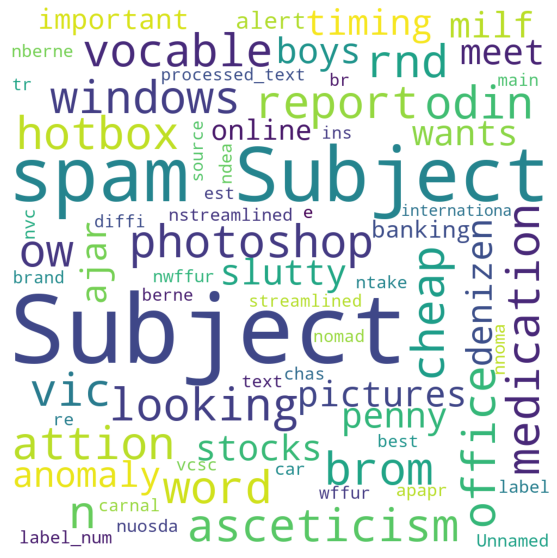

In [10]:
wc=WordCloud(background_color="white",width=1000,height=1000,max_words=70).generate(str(Spamfilter))
plt.rcParams["figure.figsize"]=(10,10)
plt.axis("off")
plt.imshow(wc)

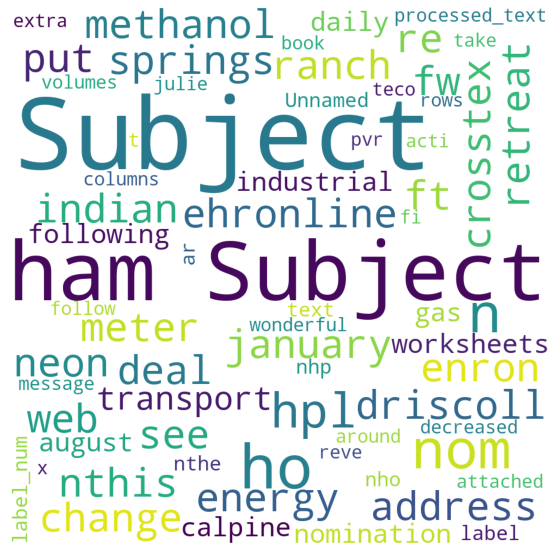

In [11]:
wc=WordCloud(background_color="white",width=1000,height=1000,max_words=70).generate(str(hamfilter))
plt.rcParams["figure.figsize"]=(10,10)
plt.axis("off")
plt.imshow(wc)

In [12]:
data['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [13]:
data['label'].value_counts().keys()

Index(['ham', 'spam'], dtype='object')

In [14]:
data['label'].value_counts().values

array([3672, 1499], dtype=int64)

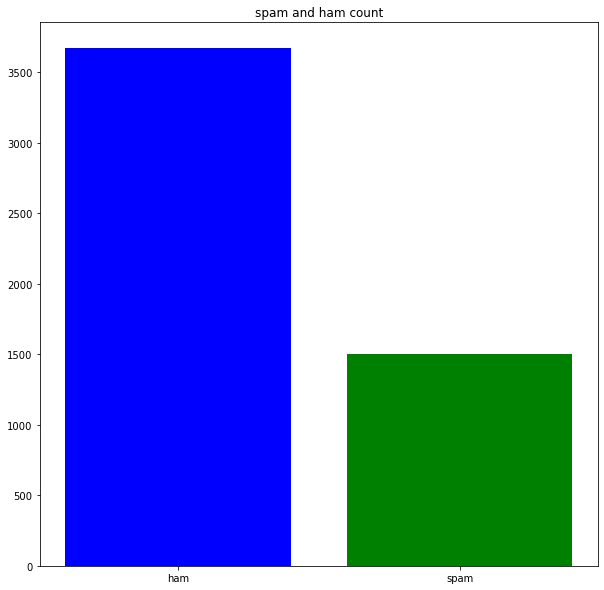

In [15]:
plt.bar(list(data['label'].value_counts().keys()),list(data['label'].value_counts().values),color=['blue','green'])
plt.title('spam and ham count')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(data.processed_text,data.label,test_size=1/3,random_state=0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# KNN- Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',KNeighborsClassifier())])

In [20]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [21]:
y_pred=clf.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
confusion_matrix(y_test,y_pred)

array([[1228,   16],
       [  55,  425]], dtype=int64)

In [67]:
accuracy_score(y_test,y_pred)

0.9588167053364269

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.99      0.97      1244
        spam       0.96      0.89      0.92       480

    accuracy                           0.96      1724
   macro avg       0.96      0.94      0.95      1724
weighted avg       0.96      0.96      0.96      1724



# RandomForest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clff=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier())])

In [44]:
clff.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [45]:
y_predd=clff.predict(x_test)

In [79]:
confusion_matrix(y_test,y_predd)
accuracy_score(y_test,y_predd)

0.9738979118329466

In [80]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1244
        spam       0.93      0.97      0.95       480

    accuracy                           0.97      1724
   macro avg       0.96      0.97      0.97      1724
weighted avg       0.97      0.97      0.97      1724



# MULTINOMIALNB

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

m_clff=Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])

In [73]:
m_clff.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [74]:
y_pp=m_clff.predict(x_test)

In [75]:
confusion_matrix(y_test,y_pp)
accuracy_score(y_test,y_pp)

0.9135730858468677

In [83]:
print(classification_report(y_test,y_pp))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94      1244
        spam       1.00      0.69      0.82       480

    accuracy                           0.91      1724
   macro avg       0.95      0.85      0.88      1724
weighted avg       0.92      0.91      0.91      1724



# SVM

In [69]:
from sklearn.svm import LinearSVC
sv_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
sv_clf.fit(x_train,y_train)
sv_pred=sv_clf.predict(x_test)
confusion_matrix(y_test,sv_pred)
accuracy_score(y_test,sv_pred)

0.9878190255220418

In [84]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1244
        spam       0.97      0.99      0.98       480

    accuracy                           0.99      1724
   macro avg       0.98      0.99      0.98      1724
weighted avg       0.99      0.99      0.99      1724



# USER INPUT

In [53]:
sv_clf.predict(['protect your phone from malware!!'])

array(['spam'], dtype=object)

In [68]:
sv_clf.predict(['We are pleased to let you know that your query has been resolved'])

array(['ham'], dtype=object)